In [2]:
import pandas as pd
import numpy as np

# Data visualization library matplotlib and seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager

import mimetypes
import urllib
import os


from google.colab import drive	
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
## setting path
# get current path
path_current = os.getcwd()
# the path is where the dataset saved
path = path_current + '/drive/MyDrive/Paper-Viz-master/Example_Data/pyramid/' 
# the "path_img" is the position where final image will be saved
path_img = path_current + '/drive/My Drive/Paper-Viz-master/Images/'

In [12]:
class pyramid:
    # read data
  def read_file(self,file):
    file_url = urllib.request.pathname2url(file)
    ftype = mimetypes.guess_type(file_url, strict=True)[0]
    ## read data file according to its formate, default includes three types of files: csv/excel/text
    # read csv format data from the parking dataset
    if 'csv' in ftype:
      # usecols: return a subset of the columns, here choose one column to use in the line chart
      data = pd.read_csv(path+file)
    # read excel format data from the parking dataset
    elif 'sheet' in ftype:
      data = pd.read_excel(path+file)
    # read text format data from the parking dataset
    elif ftype == 'text/plain':
      data = pd.read_csv(path+file, sep="\t")
    else:
      print("File type cannot find!")
    return data

  # check the available file name
  # if the input file name already existed then rename to file_1, file_2
  def get_available_name(self,filename):
    n=[1]
    def check_meta(file_name):
      file_name_new=file_name
      if file_name in [os.path.splitext(i)[0] for i in os.listdir(path_img)]:   
          file_name_new=file_name+'_'+str(n[0])
          n[0]+=1
      if file_name_new in [os.path.splitext(i)[0] for i in os.listdir(path_img)]:   
          file_name_new=check_meta(file_name)
      return file_name_new
      available_name=check_meta(filename)
    return available_name

  # file: file name of your data source
  # x_col_name: the columns name of x axis
  # y_col_name: the columns name of y axis  
  # group_col: the category columns
  # paper_type : 'single' or 'double'
  def pyramid(self,file,x_col_name,y_col_name,group_col,paper_type ,**kwargs):  
    # Configuration of the pyramid chart
    # plotwidth: width of the plot
    # plotheight: height of the plot
    # my_font: the typeface of x, y labels
    # labeltext_size: text size of x,y labels
    # labelpad: pad size of label
    # title: True or False as options. If it is True, add title for the plot
    # title_pad: if the title is True, modify pad size of title
    # title_size: if the title is True, modify size of title
    # title_loc: if the title is True, modify location of title
    # color: the colors of pyramid
    # axis_scale: get more blank in x,y axis
    # sort: True or False, if true, sort the value in ascending order
    # x_label: the content of x label
    # y_label: the content of y label
    # xlabel_rotate: the rotation of x axis labels
    # ylabel_rotate: the rotation of y axis labels
    # tick_size: set the size of ticks
    # legend_loc: location of legend
    # legend_textsize: size of legend text
    # annotate_textsize: the font size of annotation
    # x_pos_parameter: get the relative x position of annotation,
    # y_pos_parameter: get the relative y position of annotation,
    # save_image: True or False as options. If it is True, save chart
    # savefig_bbox_inches: Bounding box in inches
    # file_name: the file name in saving image

    single_column_conf={ 'plotwidth':8,
                      'plotheight':6, 
                      'my_font':'DejaVu Sans',
                      'labeltext_size':16,
                      'labelpad':10,
                      'title':False,
                      'title_pad':10,
                      'title_size':20,
                      'title_loc':'center',
                      'color':['skyblue','khaki'],
                      'axis_scale':2,
                      'sort':False,
                      'x_label':None,
                      'y_label':None,
                      'xlabel_rotate':0,
                      'ylabel_rotate':0,
                      'tick_size':13,
                      'annotate':False,
                      'legend_loc':'upper right',
                      'legend_textsize':14,
                      'annotate_textsize':10,
                      'x_pos_parameter':2.5,
                      'y_pos_parameter':10,
                      'save_image':False,
                      'savefig_bbox_inches':'tight',
                      'file_name':'pyramid'
                      }

    double_column_conf={ 'plotwidth':8,
                      'plotheight':6, 
                      'my_font':'DejaVu Sans',
                      'labeltext_size':17,
                      'labelpad':10,
                      'title':False,
                      'title_pad':10,
                      'title_size':20,
                      'title_loc':'center',
                      'color':['skyblue','khaki'],
                      'axis_scale':2,
                      'sort':False,
                      'x_label':None,
                      'y_label':None,
                      'xlabel_rotate':0,
                      'ylabel_rotate':0,
                      'tick_size':14,
                      'annotate':False,
                      'legend_loc':'upper right',
                      'legend_textsize':15,
                      'annotate_textsize':10,
                      'x_pos_parameter':2.5,
                      'y_pos_parameter':10,
                      'save_image':False,
                      'savefig_bbox_inches':'tight',
                      'file_name':'pyramid'
                      }                  

    # choose configuration
    if paper_type == 'single':
      conf = single_column_conf
    elif paper_type == 'double':
      conf = double_column_conf  

  # when new configuraton is set, update the original one
    conf.update(kwargs)  
    ## create figure and set figure size  
    fig, ax_left = plt.subplots(figsize = (conf['plotwidth'], conf['plotheight']))
 
    # read file 
    try:
      data = self.read_file(file)
    except Exception:
      print('Sorry, this file does not exist, please check the file name')   
    
    #plot
    #check if there are repetitive records in y columns
    data=data.groupby([group_col[0], y_col_name[0]], as_index=False).sum()
    
    # if two category values have same plus or minus characteristic, change one of them
    if len(data[group_col[0]].unique()) ==2:
      cate=data[group_col[0]].unique()
      
      if (data.loc[data[group_col[0]] == cate[0],x_col_name] > 0).all().values != (data.loc[data[group_col[0]] == cate[1],x_col_name] > 0).all().values:
        pass
      else:
        data.loc[data[group_col[0]]==cate[0], x_col_name]=data.loc[data[group_col[0]]==cate[0], x_col_name].apply(lambda x: -x)

    # give each category one color   
    color=conf['color']
    group_col=group_col[0]
    # create pyramid by barplot
    # if sort is false draw directly
    if conf['sort']==False:      
      for c, group in zip(color, data[group_col].unique()):       
        g = sns.barplot(x=x_col_name[0],y=y_col_name[0],data=data.loc[data[group_col]==group, :],color=c,label=group)
    # sort each line by comparing their total length  
    else:
      data['abs']=data[x_col_name[0]].abs()
      df=data[[y_col_name[0],'abs']].groupby(y_col_name[0],as_index=False).sum()
      df.sort_values('abs',inplace=True)
      sorted=list(df[y_col_name[0]])
      data.index=data[y_col_name[0]]
      data=data.loc[sorted]
      # draw pyramid by using sorted data
      for c, group in zip(color, data[group_col].unique()):        
        g = sns.barplot(x=x_col_name[0],y=y_col_name[0],data=data.loc[data[group_col]==group, :],color=c,label=group)
    # get more blank in x, y axis   
    ax_left_xlim = ax_left.get_xlim()         
    ax_left.set_xlim(ax_left_xlim[0]*conf['axis_scale'],ax_left_xlim[1]*conf['axis_scale'])
    ax_left_ylim = ax_left.get_ylim()         
    ax_left.set_ylim(ax_left_ylim[0],ax_left_ylim[1]*conf['axis_scale'])
    # set all value in x axis to be positive
    ax_left.set_xticklabels([str(abs(int(x))) for x in ax_left.get_xticks()])

    # annotate actual value
    if conf['annotate']==True:  
      for p in g.patches:  
        # annotate the area in the left of chart
        if p.get_width()<0:          
          g.annotate(format(abs(p.get_width()), '.1f'), 
                    (len(str(p.get_width())) + p.get_width() , p.get_y()+p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (-len(str(p.get_width()))*conf['x_pos_parameter'],p.get_height()*conf['y_pos_parameter']), 
                    textcoords = 'offset points',fontsize=conf['annotate_textsize'])
        # annotate the area in the right of chart
        else:          
          g.annotate(format(abs(p.get_width()),'.1f'), 
                    ( p.get_width() , p.get_y()+p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (len(str(p.get_width()))*conf['x_pos_parameter'],  p.get_height()*conf['y_pos_parameter']), 
                    textcoords = 'offset points',fontsize=conf['annotate_textsize'])

    # x,y label setting
    ax_left.set_xlabel(conf['x_label'], fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
    ax_left.set_ylabel(conf['y_label'], fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])  
    # x,y ticks setting
    for tick in ax_left.xaxis.get_major_ticks():
      tick.label.set_fontsize(conf['tick_size'])
    for tick in ax_left.yaxis.get_major_ticks():
      tick.label.set_fontsize(conf['tick_size'])
    # rotate x,y axis
    if conf['xlabel_rotate'] !=0:
      plt.setp(ax_left.get_xticklabels(), rotation=conf['xlabel_rotate'], ha="right",
            rotation_mode="anchor")
    if conf['ylabel_rotate'] !=0:  
      plt.setp(ax_left.get_yticklabels(), rotation=conf['ylabel_rotate'], ha="right",
            rotation_mode="anchor")
    # legend setting
    plt.legend( fontsize=conf['legend_textsize'],loc=conf['legend_loc'])
    # title setting
    if conf['title'] == False:
      pass
    else:
      ax_left.set_title(conf['title'], fontsize=conf['title_size'], loc=conf['title_loc'], pad=conf['title_pad'])
    #save plot setting
    if conf['save_image'] == True:
      file_name=conf['file_name']
      file_newname = self.get_available_name(file_name)
      plt.savefig(path_img+file_newname, bbox_inches=conf['savefig_bbox_inches']) 
     
    # showing the image
    plt.show()


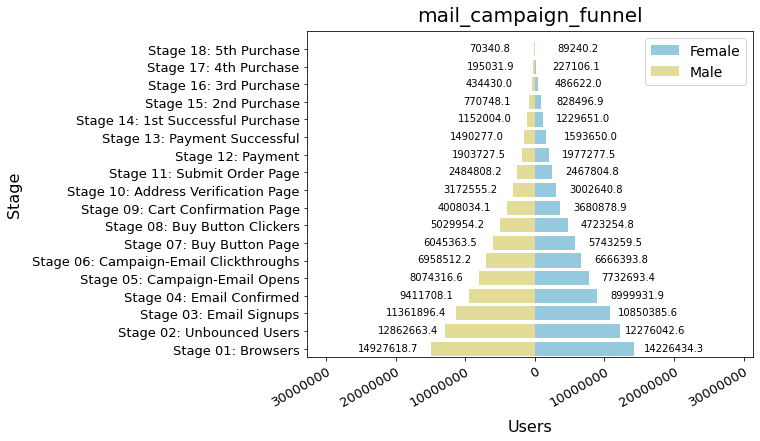

In [13]:
# pyramid with annotation
p1=pyramid()
p1.pyramid('email_campaign_funnel.csv',x_col_name=['Users'],y_col_name=['Stage'],group_col=['Gender'],x_label='Users',y_label='Stage',paper_type='single',sort=True,annotate=True,xlabel_rotate=30,title='mail_campaign_funnel')

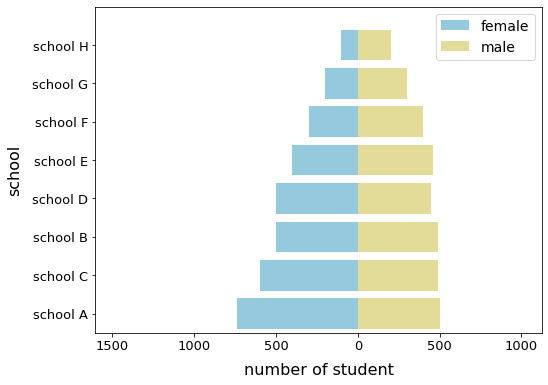

In [14]:
# pyramid with sort function
p2=pyramid()
p2.pyramid('school.xlsx',x_col_name=['people'],y_col_name=['school'],group_col=['gender'],x_label='number of student',y_label='school',paper_type='single',sort=True)